For Temperature: 28 and Humidity: 37, the Output is: 15.827239131337448


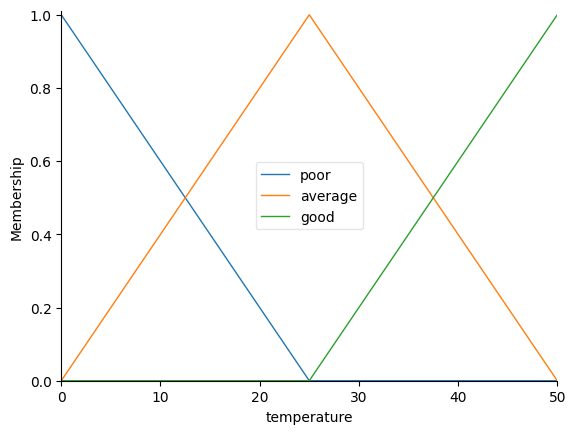

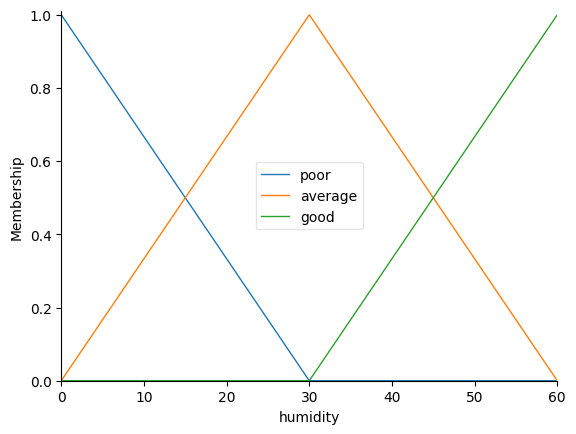

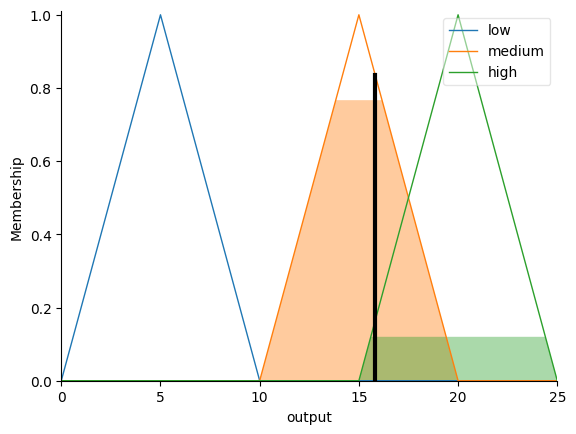

In [3]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Load dataset
data_url = 'dataset.csv'  # Replace with your dataset link
data = pd.read_csv(data_url)

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 61, 1), 'humidity')
output = ctrl.Consequent(np.arange(0, 26, 1), 'output', defuzzify_method='centroid')

# Generate fuzzy membership functions
temperature.automf(3)
humidity.automf(3)
output['low'] = fuzz.trimf(output.universe, [0, 5, 10])
output['medium'] = fuzz.trimf(output.universe, [10, 15, 20])
output['high'] = fuzz.trimf(output.universe, [15, 20, 25])

# Define rules using Sugeno-type fuzzy inference
rule1 = ctrl.Rule(temperature['poor'] & humidity['poor'], output['low'])
rule2 = ctrl.Rule(temperature['average'] & humidity['average'], output['medium'])
rule3 = ctrl.Rule(temperature['good'] & humidity['good'], output['high'])

# Create control system
output_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

# Simulation
test_temp = 28
test_humidity = 37

output_simulation.input['temperature'] = test_temp
output_simulation.input['humidity'] = test_humidity
output_simulation.compute()

print(f"For Temperature: {test_temp} and Humidity: {test_humidity}, the Output is: {output_simulation.output['output']}")

# Plot membership functions and results
temperature.view()
humidity.view()
output.view(sim=output_simulation)
plt.show()